# Assignment 9
Kaylie Evans || DATA 602 Fall 2024 

In [2]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import matplotlib.pyplot as plt

In [3]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

### Q1

Data set: Iris

Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a separate Python list containing target names

In [5]:
# Features first 5 rows:
features_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(features_df.head())

# Target names list:
targets_list = iris.target_names.tolist()
print(targets_list)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa', 'versicolor', 'virginica']


### Q2

Data set: Iris

Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in argument new_observations. Return back the target names of each prediction (and not their encoded values, i.e. return setosa instead of 0).

In [7]:
# Define fit_knn_predict_new_observations function with new_observation and neighbors arguments
def fit_knn_predict_new_observations(new_observations, neighbors=5):
    # Prepare the data
    X = iris.data
    y = iris.target
    
    # Fit KNN model
    knn = KNN(n_neighbors=neighbors)
    knn.fit(X, y)
    
    # Make predictions on new observations
    predictions = knn.predict(new_observations)
    
    # Convert encoded predictions to target names and return this value
    predicted_target_names = iris.target_names[predictions]
    return predicted_target_names

In [8]:
# Define and come up with the example new observations (I took the known values and shifted some numbers slightly)
new_observations = np.array([[5.2, 3.5, 1.5, 0.2],  
                            [6.7, 3.0, 5.2, 2.3],  
                            [4.8, 3.0, 1.4, 0.2]])

# Call the fit_knn_predict_new_observations function and print the results
predictions = fit_knn_predict_new_observations(new_observations, neighbors=5)
print("\nPredictions for new observations:")
print(predictions)



Predictions for new observations:
['setosa' 'virginica' 'setosa']


### Q3

Data set: Iris

Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

Generate and return back an accuracy score using the test data that was split out

In [10]:
# Define train_knn_model function with split size and neighbors parameters
def train_knn_model(split=0.2, neighbors=5):
    # Prepare the data
    X = iris.data
    y = iris.target

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = tts(X, y, test_size=split, random_state=21, stratify=y)

    # Fit KNN model
    knn = KNN(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate and return accuracy score
    accuracy = knn.score(X_test, y_test) 
    return accuracy

In [11]:
# Call the train_knn_model function and print the results
accuracy = train_knn_model(split=0.2, neighbors=5)
print("Accuracy of the KNN model:", accuracy)

Accuracy of the KNN model: 0.9666666666666667


### Q4

Data set: Iris

Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

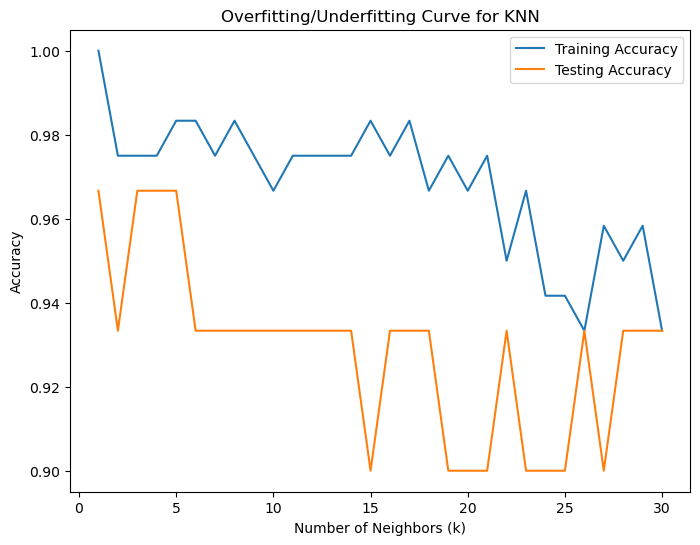

In [23]:
# Create space for train and test accuracies to be stored
train_accuracies = {}
test_accuracies = {}

# Global prepare the data
X = iris.data
y = iris.target

# Global split data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=21, stratify=y)

# Trying all k from 1 to 30
neighbors = np.arange(1,31)

# Loop through neighbors and save the accuracy score for each
for neighbor in neighbors:
    knn = KNN(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    # Store accuracies in dictionaries
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Make a line plot with accurracies 
plt.figure(figsize=(8, 6))
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Overfitting/Underfitting Curve for KNN')
plt.legend()
plt.show()